In [15]:
import os
import kagglehub
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder

# Preprocessing

In [4]:
# Download latest version of this project's dataset
path = kagglehub.dataset_download("teejmahal20/airline-passenger-satisfaction/version/1")
train = pd.read_csv(os.path.join(path, "train.csv"))
test = pd.read_csv(os.path.join(path, "test.csv"))

print("Path to dataset files:", path)

Path to dataset files: /Users/berkay/.cache/kagglehub/datasets/teejmahal20/airline-passenger-satisfaction/versions/1


In [5]:
train = train.drop(columns=['Unnamed: 0', 'id'])
test = test.drop(columns=['Unnamed: 0', 'id'])

In [6]:
# Represent "satisfaction", a string column, as a numerical value.
label_encoder = LabelEncoder()
train['satisfaction'] = label_encoder.fit_transform(train['satisfaction'])
test['satisfaction'] = label_encoder.transform(test['satisfaction'])

In [8]:
# Apply one-hot encoding
# https://www.geeksforgeeks.org/ml-one-hot-encoding/
categorical = train.select_dtypes(include=['object']).columns
train = pd.get_dummies(train, columns=categorical, drop_first=True)
test = pd.get_dummies(test, columns=categorical, drop_first=True)

# Visualization

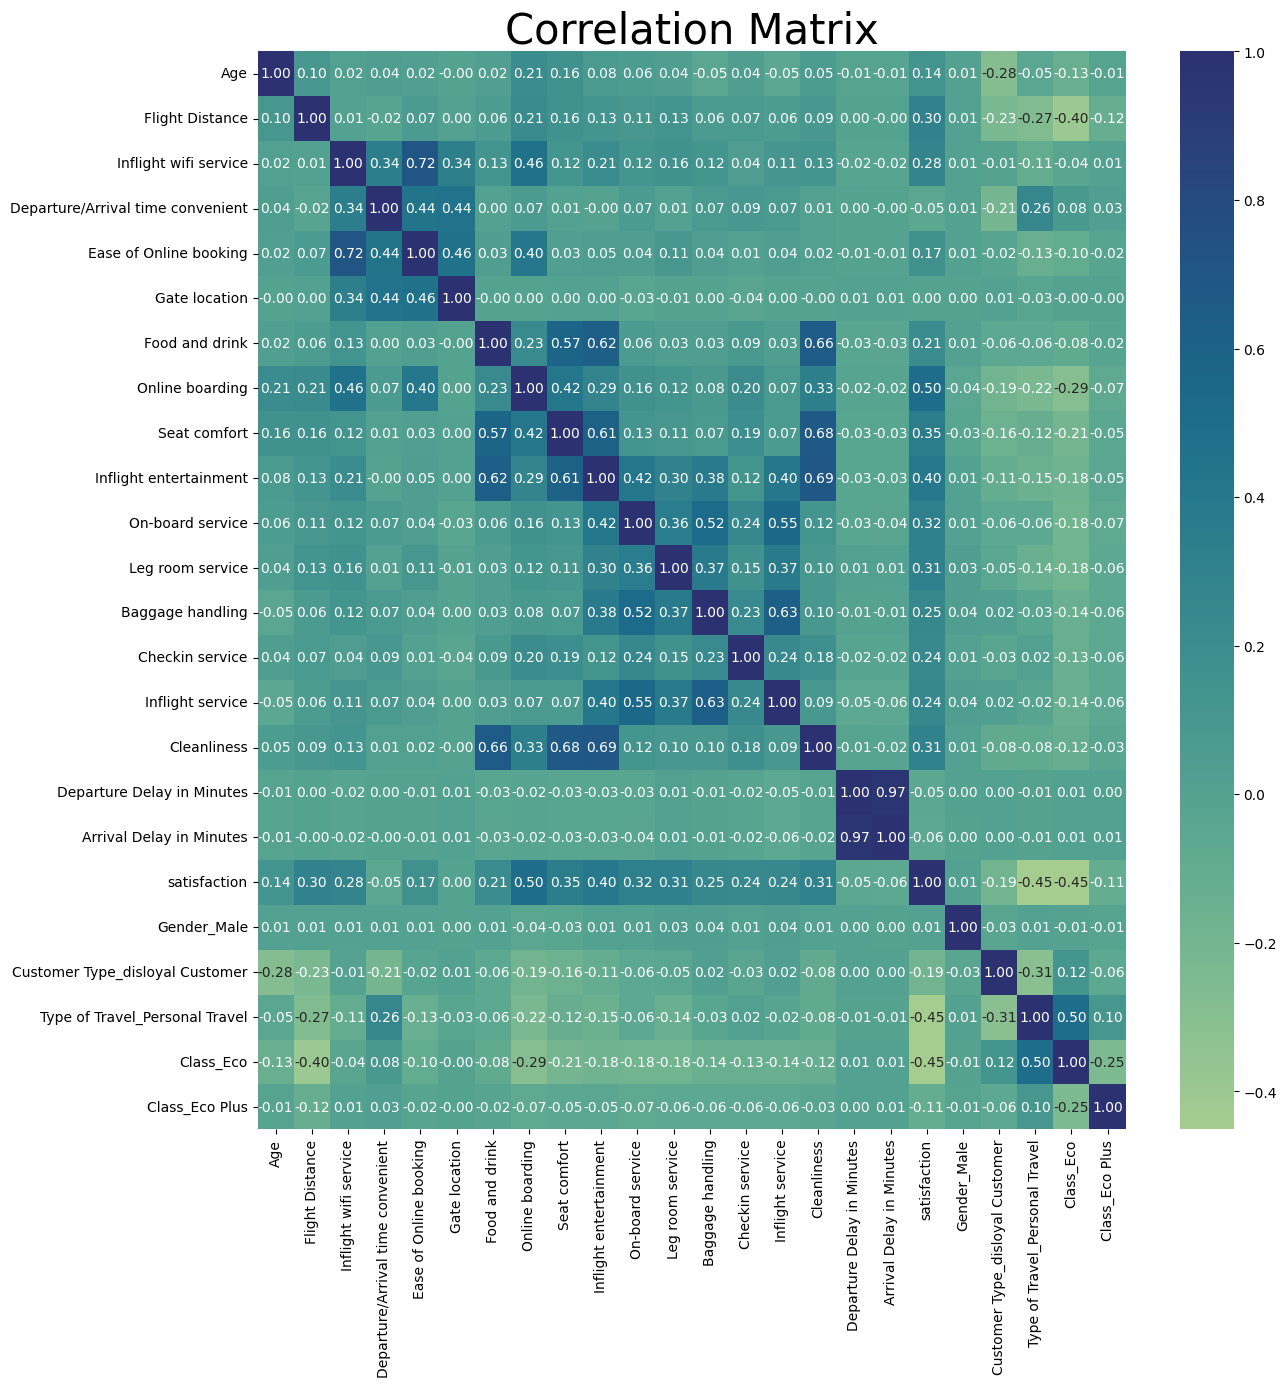

In [27]:
# Display the correlation matrix
def display_correlation_matrix(df):
    plt.figure(figsize=(14, 14))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='crest', cbar=True)
    plt.title('Correlation Matrix', fontsize=30)
    plt.show()

display_correlation_matrix(train)